In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [114]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [115]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [116]:
series = np.array(df["close"]).reshape(-1, 1)

In [117]:
series

array([[28.185],
       [28.07 ],
       [28.13 ],
       ...,
       [54.69 ],
       [55.61 ],
       [54.46 ]])

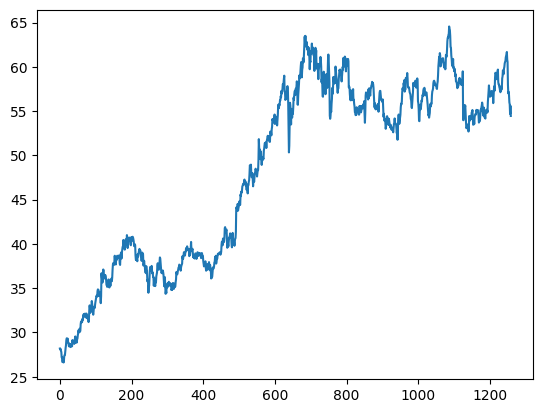

In [118]:
plt.plot(series)

In [119]:
N, D = series.shape
N

1259

In [120]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()
series.shape

(1259,)

In [121]:
series

array([-1.62500489, -1.64174953, -1.6330132 , ...,  2.2342704 ,
        2.36822751,  2.20078112])

In [122]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)


In [123]:
X.shape

(1249, 10, 1)

In [124]:
X[0].shape

(10, 1)

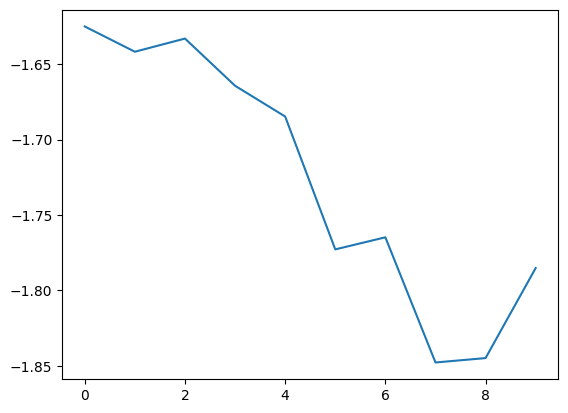

In [125]:
plt.plot(X[0])

In [127]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(T, D)),
    tf.keras.layers.LSTM(5),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)
)
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Epoch 1/80
20/20 [==============================] - 3s 41ms/step - loss: 0.1684 - val_loss: 0.0870
Epoch 2/80
20/20 [==============================] - 0s 12ms/step - loss: 0.0090 - val_loss: 0.0422
Epoch 3/80
20/20 [==============================] - 0s 12ms/step - loss: 0.0068 - val_loss: 0.0343
Epoch 4/80
20/20 [==============================] - 0s 12ms/step - loss: 0.0074 - val_loss: 0.0309
Epoch 5/80
20/20 [==============================] - 0s 17ms/step - loss: 0.0065 - val_loss: 0.0379
Epoch 6/80
20/20 [==============================] - 0s 13ms/step - loss: 0.0071 - val_loss: 0.0759
Epoch 7/80
20/20 [==============================] - 0s 14ms/step - loss: 0.0083 - val_loss: 0.0456
Epoch 8/80
20/20 [==============================] - 0s 15ms/step - loss: 0.0063 - val_loss: 0.0473
Epoch 9/80
20/20 [==============================] - 0s 14ms/step - loss: 0.0057 - val_loss: 0.0346
Epoch 10/80
20/20 [==============================] - 0s 13ms/step - loss: 0.0058 - val_loss: 0.0516
Epoch 11/

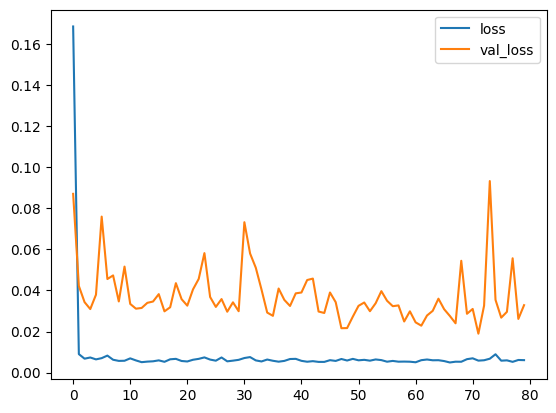

In [128]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

40/40 [==============================] - 1s 2ms/step
(1249, 1)


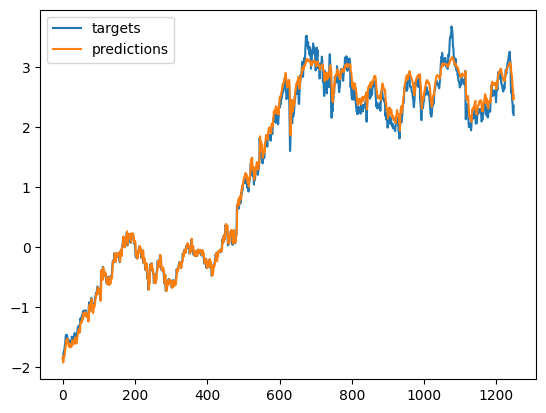

In [129]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

In [137]:
x_last = X[-N//2].reshape(1, T, 1)
x_last

array([[[2.56770712],
        [2.59100401],
        [2.64487807],
        [2.72496112],
        [2.7060324 ],
        [2.74388985],
        [2.81814868],
        [2.8632864 ],
        [2.60410851],
        [2.59974034]]])

1/1 [==============================] - 0s 22ms/step


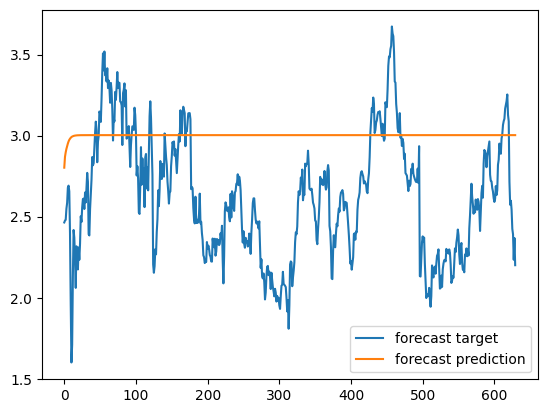

In [139]:
val_target = Y[-N//2:]
x_last = X[-N//2]
val_predections = []
# first_serie = series[N//2:N//2+T]

while len(val_predections) < len(val_target):
    
    prediction = model.predict(x_last.reshape(1, T, 1))[0, 0]
    val_predections.append(prediction)
    
    x_last = np.roll(x_last, -1)
    x_last[-1] = prediction
    
plt.plot(val_target, label='forecast target')
plt.plot(val_predections, label='forecast prediction')
plt.legend()

In [3]:
df["preClose"] = df["close"].shift(1) # close up by 1 (yesterday close meet today opening)

In [6]:
df.head()

,date,open,high,low,close,volume,Name,preClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [7]:
df["result"] = (df.open-df.preClose)/df.preClose
df

,date,open,high,low,close,volume,Name,preClose,result
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,0.002661
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,-0.002494
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,0.003555
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005373
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX,56.810,-0.009329
1255,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX,56.000,-0.001786
1256,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX,55.770,-0.004303
1257,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX,54.690,-0.018376


<Axes: >

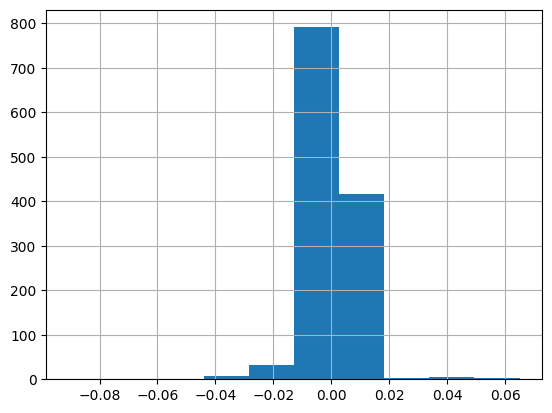

In [8]:
df["result"].hist()

In [15]:
series = df.result.values[1:].reshape(-1, 1)
series.shape

(1258, 1)

In [16]:
N = len(series)

In [17]:
scaler = StandardScaler()
scaler.fit(series[:-N//2])
series = scaler.transform(series).flatten()
series

array([ 0.21366898, -0.52145993,  0.34115447, ..., -0.77953356,
       -2.78649702, -1.52500405])

In [18]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(T, 1)),
    tf.keras.layers.LSTM(5),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Epoch 1/80
20/20 [==============================] - 3s 44ms/step - loss: 1.0269 - val_loss: 1.6487
Epoch 2/80
20/20 [==============================] - 0s 13ms/step - loss: 1.0114 - val_loss: 1.6619
Epoch 3/80
20/20 [==============================] - 0s 17ms/step - loss: 1.0052 - val_loss: 1.6551
Epoch 4/80
20/20 [==============================] - 0s 12ms/step - loss: 1.0024 - val_loss: 1.6756
Epoch 5/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9994 - val_loss: 1.6770
Epoch 6/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9969 - val_loss: 1.6849
Epoch 7/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9931 - val_loss: 1.6964
Epoch 8/80
20/20 [==============================] - 0s 12ms/step - loss: 0.9929 - val_loss: 1.6799
Epoch 9/80
20/20 [==============================] - 0s 10ms/step - loss: 0.9916 - val_loss: 1.6927
Epoch 10/80
20/20 [==============================] - 0s 11ms/step - loss: 0.9867 - val_loss: 1.7162
Epoch 11/

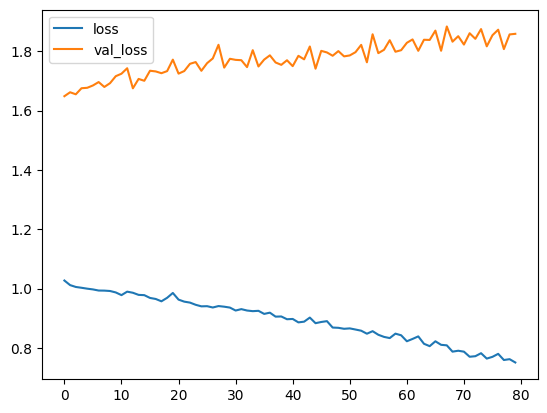

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

39/39 [==============================] - 1s 4ms/step
(1248, 1)


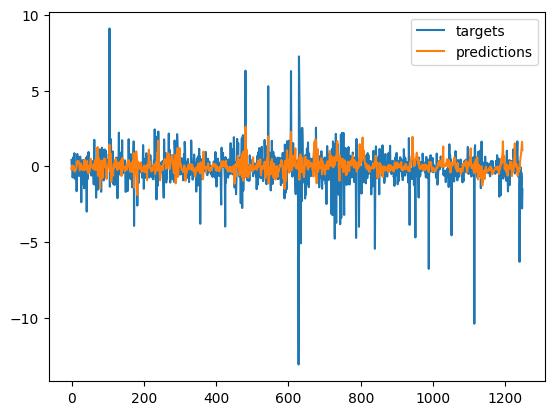

In [21]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 26ms/step


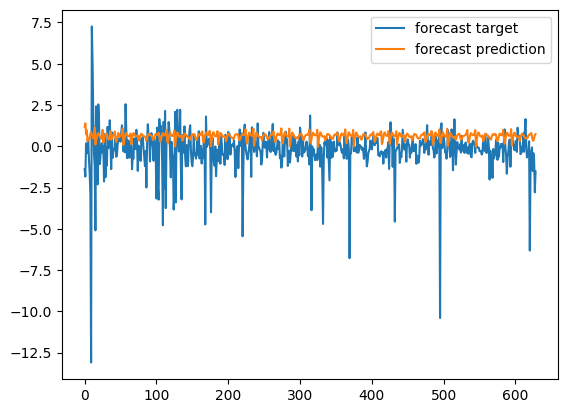

In [22]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
